In [1]:
import va
import numpy as np
import cv2 as cv

""
""

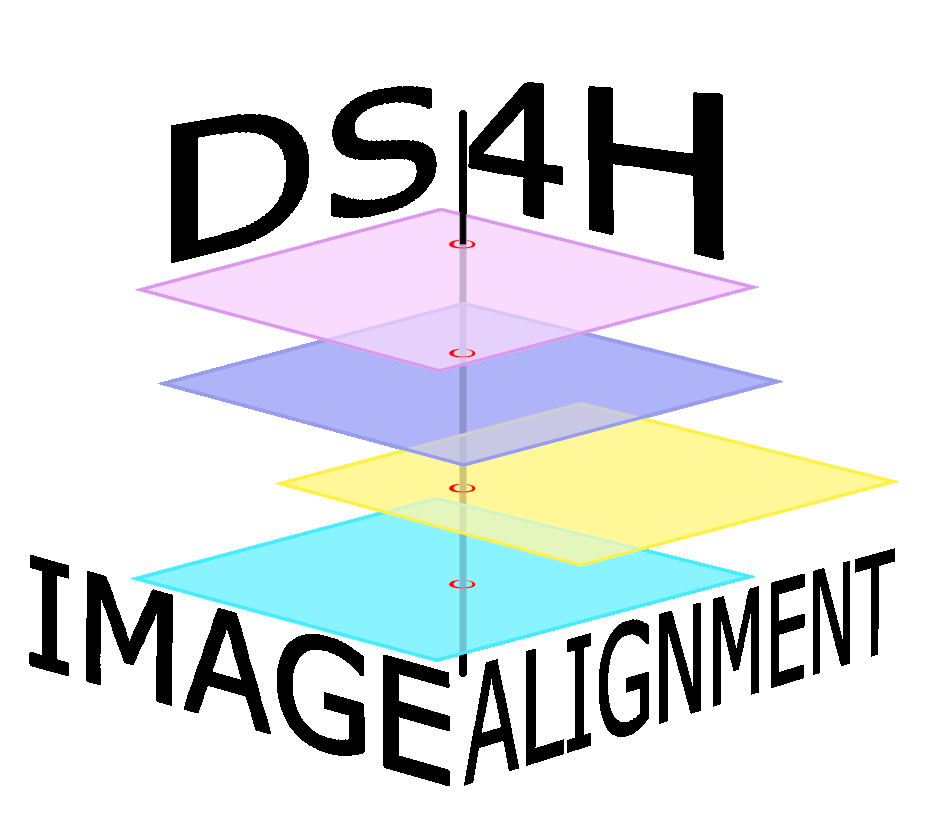

In [60]:
img = cv.imread("./LOGOFATTOMEGLIO.png", cv.IMREAD_UNCHANGED)
c_p = cv.cvtColor(img, cv.COLOR_BGRA2BGR)
back = np.full_like(img, 255)
trans_mask = img[:,:,3] == 0
img[trans_mask] = [255, 255, 255, 255]
new_img = cv.cvtColor(img, cv.COLOR_BGRA2BGR)
va.show(new_img)


""
""

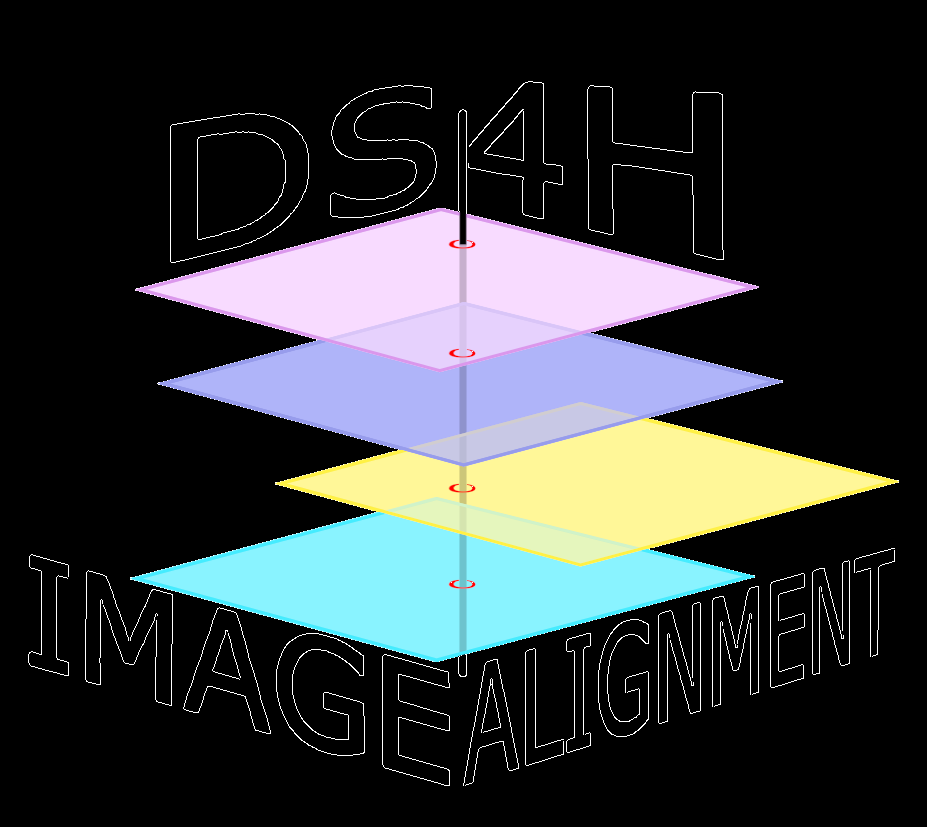

True

In [128]:
gr = cv.cvtColor(new_img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gr, 10, 20)
cont, tree = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
res = cv.drawContours(edges, cont, -1, (255, 255, 255), 1)
bgr_letters = cv.cvtColor(res, cv.COLOR_GRAY2BGR)
out = c_p + bgr_letters
va.show(out)
cv.imwrite("output3.png", out)


""
""

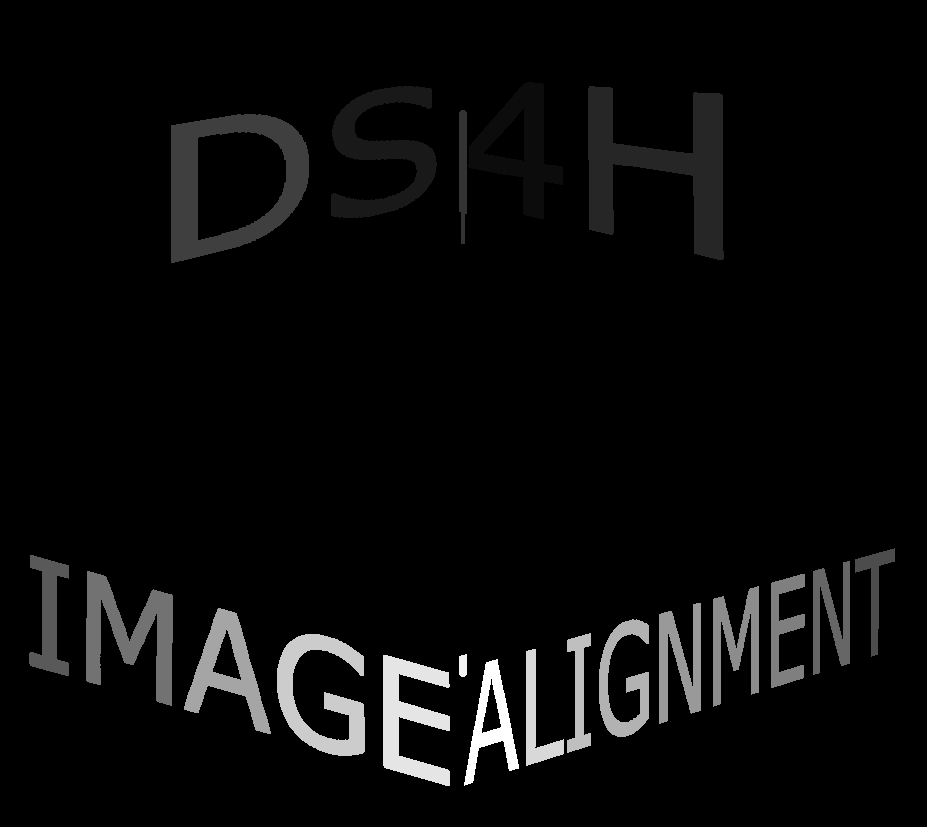

In [115]:
letters = np.zeros_like(gr)
letters[gr == 0] = 255
num, cc, stats, centr = cv.connectedComponentsWithStats(letters)
va.show(cc)

""
""

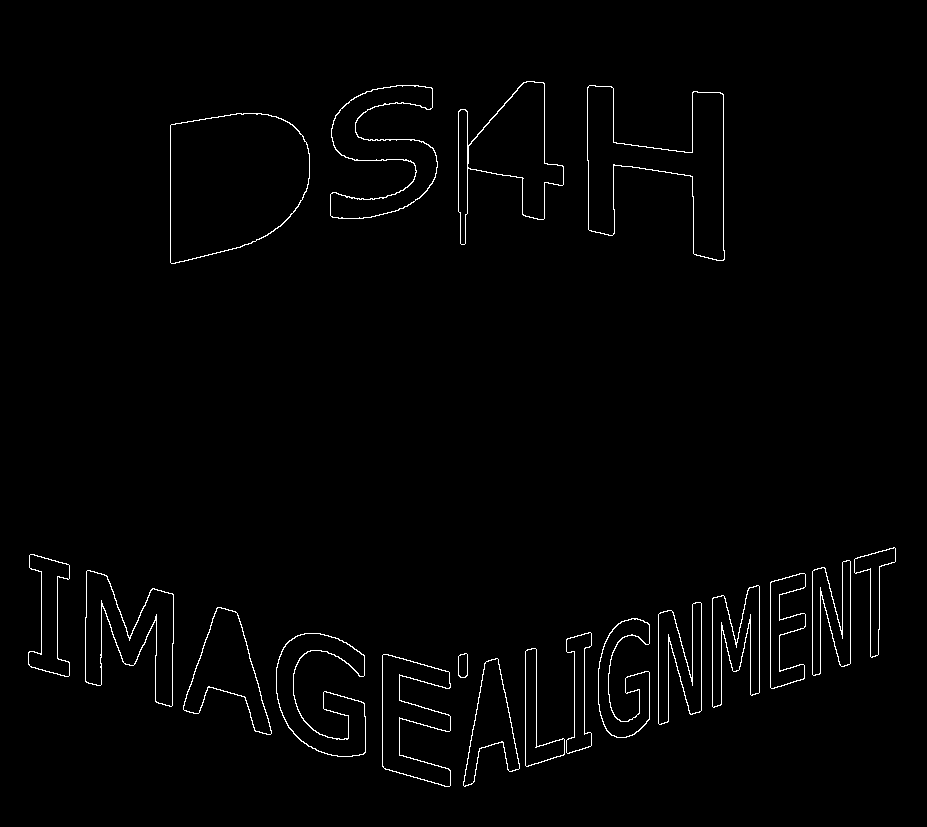

""
""

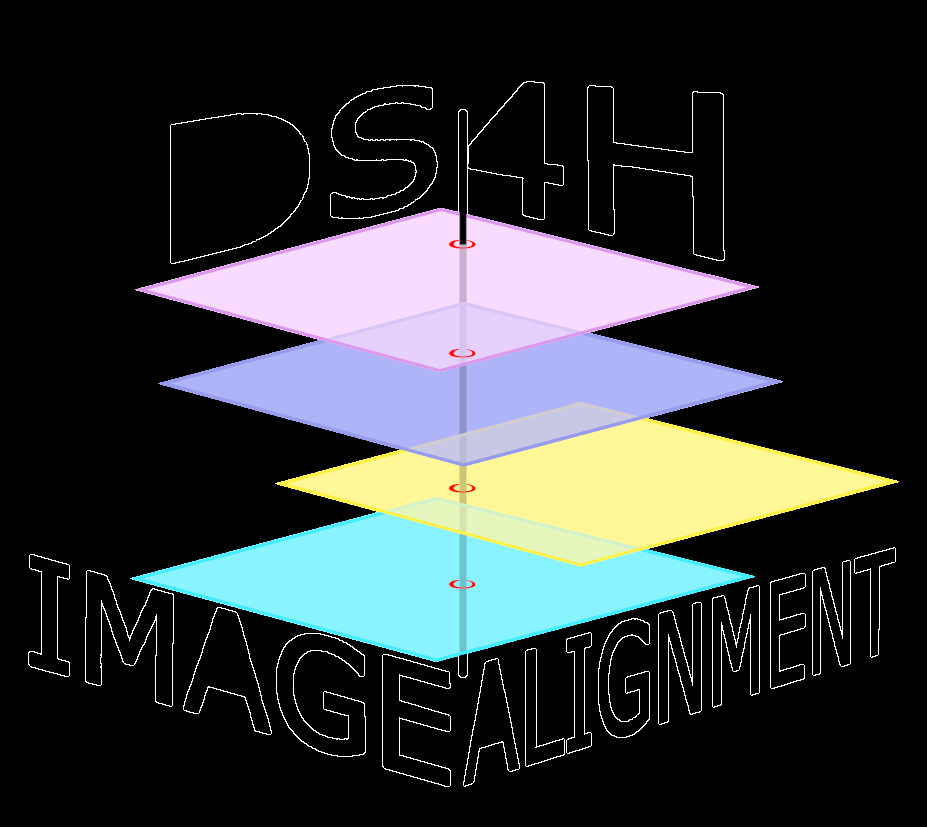

In [120]:
out = np.zeros_like(letters)
for i in range(1, num):
    mask = np.zeros_like(cc, dtype=np.uint8)
    mask[cc == i] = 255
    cont, tree = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    res = cv.drawContours(mask, cont, -1, (255, 255, 255), 2)
    res[cc == i] = 0
    out = out + res

va.show(out)
bgr_letters = cv.cvtColor(out, cv.COLOR_GRAY2BGR)
n_image = c_p + bgr_letters
va.show(n_image)

In [82]:
cv.imwrite("./output2.png", n_image)

True